# Problem statement - There are times when a user writes Good, Nice App or any other positive text, in the review and gives 1-star rating. Your goal is to identify the reviews where the semantics of review text does not match rating. 

## Your goal is to identify such ratings where review text is good, but rating is negative- so that the support team can point this to users.


## Importing libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('chrome_reviews.csv')
pd.set_option("display.max_columns", None)
display(data.head())

ID                                         Review URL  \
0  3886  https://play.google.com/store/apps/details?id=...   
1  3887  https://play.google.com/store/apps/details?id=...   
2  3888  https://play.google.com/store/apps/details?id=...   
3  3889  https://play.google.com/store/apps/details?id=...   
4  3890  https://play.google.com/store/apps/details?id=...   

                                             Text  Star  Thumbs Up  \
0                      This is very helpfull aap.     5          0   
1                                            Good     3          2   
2  Not able to update. Neither able to uninstall.     1          0   
3                                        Nice app     4          0   
4                               Many unwanted ads     1          0   

          User Name Developer Reply        Version Review Date  \
0  INDIAN Knowledge             NaN  83.0.4103.106  2020-12-19   
1  Ijeoma Happiness             NaN  85.0.4183.127  2020-12-19   
2  Priti D BtCFs-29             NaN  85.0.4183.127  2020-12-19   
3        Ajeet Raja             NaN  77.0.3865.116  2020-12-19   
4           Rams Mp             NaN   87.0.4280.66  2020-12-19   

               App ID  
0  com.android.chrome  
1  com.android.chrome  
2  com.android.chrome  
3  com.android.chrome  
4  com.android.chrome

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7204 entries, 0 to 7203
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               7204 non-null   int64 
 1   Review URL       7204 non-null   object
 2   Text             7203 non-null   object
 3   Star             7204 non-null   int64 
 4   Thumbs Up        7204 non-null   int64 
 5   User Name        7204 non-null   object
 6   Developer Reply  95 non-null     object
 7   Version          7119 non-null   object
 8   Review Date      7204 non-null   object
 9   App ID           7204 non-null   object
dtypes: int64(3), object(7)
memory usage: 562.9+ KB


In [3]:
df = data[['Text','Star']]
df.head()

Text  Star
0                      This is very helpfull aap.     5
1                                            Good     3
2  Not able to update. Neither able to uninstall.     1
3                                        Nice app     4
4                               Many unwanted ads     1

In [4]:
null_val = [val for val in df.columns if df[val].isnull().any()]
len(null_val)

1

In [5]:
df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7204 entries, 0 to 7203
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    7203 non-null   object
 1   Star    7204 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 112.7+ KB


## Data Preprocessing

In [6]:
#import natural language tool kit
import nltk
import re #regular expressions module

nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/manaalsaxena/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
#declaring porter stemmer
port = PorterStemmer()
def text_cleaner (text): #function to clean text
    cleaned= re.sub('[^a-zA-Z]', " ", text) 
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [port.stem (word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    return cleaned

In [8]:
df["Cleaned_Text"] = df["Text"].apply(lambda x: text_cleaner(str(x))) #declare cleaned text feature
df["Length"] = df["Text"].apply(lambda x:len(str(x))) #declare length feature
df.head()

<ipython-input-8-3726a45343ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Cleaned_Text"] = df["Text"].apply(lambda x: text_cleaner(str(x))) #declare cleaned text feature
<ipython-input-8-3726a45343ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Length"] = df["Text"].apply(lambda x:len(str(x))) #declare length feature


Text  Star  \
0                      This is very helpfull aap.     5   
1                                            Good     3   
2  Not able to update. Neither able to uninstall.     1   
3                                        Nice app     4   
4                               Many unwanted ads     1   

                     Cleaned_Text  Length  
0                     helpful aap      26  
1                            good       4  
2  abl updat neither abl uninstal      46  
3                        nice app       8  
4                  mani unwant ad      17

## Data Analysis

In [9]:
!pip install textblob

In [10]:
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def sentiment_vader(text, sid):
    ss = sid.polarity_scores(text)
    ss.pop('compound')
    return max(ss, key=ss.get)

In [11]:
def sentiment_textblob(text):
        x = TextBlob(text).sentiment.polarity
        
        if x<0:
            return 'neg'
        elif x==0:
            return 'neu'
        else:
            return 'pos'

def plot_sentiment_barchart(text, method='TextBlob'):
    if method == 'TextBlob':
        sentiment = text.map(lambda x: sentiment_textblob(x))
    elif method == 'Vader':
        nltk.download('vader_lexicon')
        sid = SentimentIntensityAnalyzer()
        sentiment = text.map(lambda x: sentiment_vader(x, sid=sid))
    else:
        raise ValueError('Textblob or Vader')
    
    plt.bar(sentiment.value_counts().index,
            sentiment.value_counts())

In [12]:
plot_sentiment_barchart(df['Cleaned_Text'], method='Vader')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/manaalsaxena/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


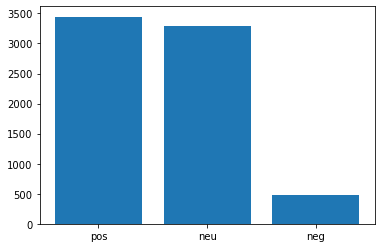

In [13]:
plot_sentiment_barchart(df['Cleaned_Text'], method='TextBlob')

In [14]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/manaalsaxena/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [15]:
df["Vader_Score"] = df["Cleaned_Text"].apply(lambda review:sid.polarity_scores(review))

<ipython-input-15-f9dbdae44815>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Vader_Score"] = df["Cleaned_Text"].apply(lambda review:sid.polarity_scores(review))


In [16]:
df["Vader_Compound_Score"]  = df['Vader_Score'].apply(lambda score_dict: score_dict['compound'])

<ipython-input-16-60334d735e9e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Vader_Compound_Score"]  = df['Vader_Score'].apply(lambda score_dict: score_dict['compound'])


In [17]:
df["Result"] = df["Vader_Compound_Score"].apply(lambda c: 'positive' if c > 0 else ('negative' if c < 0 else 'neutral'))
df.head()

<ipython-input-17-1f3f20aa1cfa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Result"] = df["Vader_Compound_Score"].apply(lambda c: 'positive' if c > 0 else ('negative' if c < 0 else 'neutral'))


Text  Star  \
0                      This is very helpfull aap.     5   
1                                            Good     3   
2  Not able to update. Neither able to uninstall.     1   
3                                        Nice app     4   
4                               Many unwanted ads     1   

                     Cleaned_Text  Length  \
0                     helpful aap      26   
1                            good       4   
2  abl updat neither abl uninstal      46   
3                        nice app       8   
4                  mani unwant ad      17   

                                         Vader_Score  Vader_Compound_Score  \
0  {'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...                0.4215   
1  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...                0.4404   
2  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...                0.0000   
3  {'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...                0.4215   
4  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...                0.0000   

     Result  
0  positive  
1  positive  
2   neutral  
3  positive  
4   neutral

In [18]:
df_attention = df[(df.Result == "positive")]
df_attention.head()

Text  Star Cleaned_Text  Length  \
0   This is very helpfull aap.     5  helpful aap      26   
1                         Good     3         good       4   
3                     Nice app     4     nice app       8   
5                This app good     4     app good      13   
10                        Good     5         good       4   

                                          Vader_Score  Vader_Compound_Score  \
0   {'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...                0.4215   
1   {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...                0.4404   
3   {'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...                0.4215   
5   {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...                0.4404   
10  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...                0.4404   

      Result  
0   positive  
1   positive  
3   positive  
5   positive  
10  positive

In [20]:
Suggestion = []
for row in df_attention["Star"] :
    if row >= 3 :
         Suggestion.append("No Attention Needed")
    else :
         Suggestion.append("Attention Needed")
            
df_attention["Suggestion"] = Suggestion
df_attention.head()

<ipython-input-20-2c07c6958186>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_attention["Suggestion"] = Suggestion


Text  Star Cleaned_Text  Length  \
0   This is very helpfull aap.     5  helpful aap      26   
1                         Good     3         good       4   
3                     Nice app     4     nice app       8   
5                This app good     4     app good      13   
10                        Good     5         good       4   

                                          Vader_Score  Vader_Compound_Score  \
0   {'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...                0.4215   
1   {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...                0.4404   
3   {'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...                0.4215   
5   {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...                0.4404   
10  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...                0.4404   

      Result           Suggestion  
0   positive  No Attention Needed  
1   positive  No Attention Needed  
3   positive  No Attention Needed  
5   positive  No Attention Needed  
10  positive  No Attention Needed

In [21]:
df_attention.Suggestion.value_counts()

No Attention Needed    3192
Attention Needed        491
Name: Suggestion, dtype: int64

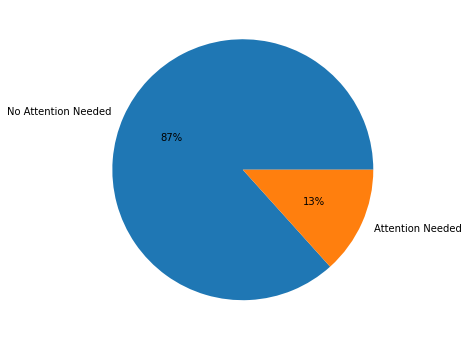

In [22]:
plt.figure(figsize=(8,6))
plt.pie(df_attention["Suggestion"].value_counts(), labels = df_attention["Suggestion"].value_counts().index, autopct="%.0f%%")
plt.show()

In [26]:
keyword = ['good','nice','thank you','best','awesome','helpful']

In [27]:
final_df = df_attention[(df_attention["Suggestion"] == "Attention Needed")]
final_df = final_df[final_df["Cleaned_Text"].isin(keyword)]
final_df.drop(final_df.iloc[:, 3:7], inplace = True, axis = 1)
display(final_df.head())
print(f"There are about {len(final_df.Suggestion)} reviews that are positive but have a bad rating")

Text  Star Cleaned_Text        Suggestion
101  Good     1         good  Attention Needed
158  Good     1         good  Attention Needed
310  Best     1         best  Attention Needed
312  Good     1         good  Attention Needed
315  Nice     1         nice  Attention Needed

There are about 72 reviews that are positive but have a bad rating
